# Linear regression

Kita akan melihat hubungan antara usia dan menit bermain.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Opening data
Pada project kali ini kita akan menggunakan data Pemain La Liga tahun 2021-2022 dari [FBref](https://fbref.com/en/comps/12/2021-2022/stats/2021-2022-La-Liga-Stats).
kali ini kita akan menggunakan kolom usia dan menit bermain aja.



In [2]:
data=pd.read_csv("playerstats.csv",delimiter=',')
data.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,-9999
0,1,Luis Abram,pe PER,DF,Granada,25.0,1996.0,8,6,560,6.2,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,0.5,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08,Matches,1f462f95
1,2,Marcos Acuña,ar ARG,DF,Sevilla,29.0,1991.0,31,26,2260,25.1,1,3,1,0,0,10,0,0.04,0.12,0.16,0.04,0.16,1.4,1.4,3.0,4.4,0.06,0.12,0.18,0.06,0.18,Matches,81442ecb
2,3,Martin Agirregabiria,es ESP,DF,Alavés,25.0,1996.0,24,17,1616,18.0,0,1,0,0,0,4,0,0.00,0.06,0.06,0.00,0.06,0.2,0.2,1.0,1.2,0.01,0.05,0.07,0.01,0.07,Matches,355c883a
3,4,Julen Agirrezabala,es ESP,GK,Athletic Club,20.0,2000.0,4,4,360,4.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,a2c1a8d3
4,5,Sergio Agüero,ar ARG,FW,Barcelona,33.0,1988.0,4,2,151,1.7,1,0,1,0,0,0,0,0.60,0.00,0.60,0.60,0.60,1.1,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80,Matches,4d034881


In [3]:
from IPython.display import display
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         617 non-null    int64  
 1   Player     617 non-null    object 
 2   Nation     616 non-null    object 
 3   Pos        617 non-null    object 
 4   Squad      617 non-null    object 
 5   Age        616 non-null    float64
 6   Born       616 non-null    float64
 7   MP         617 non-null    int64  
 8   Starts     617 non-null    int64  
 9   Min        617 non-null    int64  
 10  90s        617 non-null    float64
 11  Gls        617 non-null    int64  
 12  Ast        617 non-null    int64  
 13  G-PK       617 non-null    int64  
 14  PK         617 non-null    int64  
 15  PKatt      617 non-null    int64  
 16  CrdY       617 non-null    int64  
 17  CrdR       617 non-null    int64  
 18  Gls.1      617 non-null    float64
 19  Ast.1      617 non-null    float64
 20  G+A       

None

## EDA

In [4]:
data.Age.describe()

count    616.000000
mean      25.935065
std        4.661101
min       16.000000
25%       22.000000
50%       26.000000
75%       29.000000
max       40.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Jumlah Pemain')

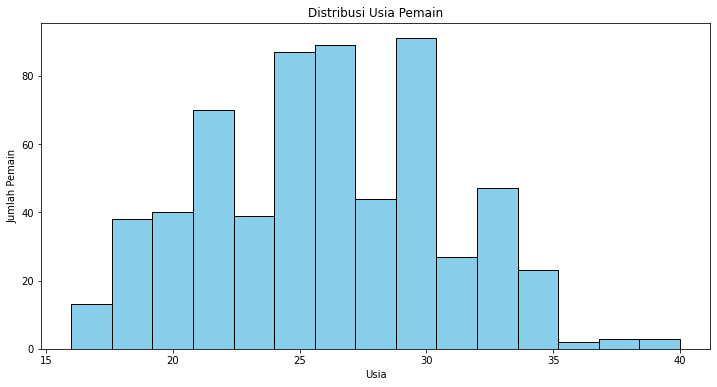

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Pemain')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pemain')
#plt.savefig('age_dist.png')

In [6]:
data.Min.describe()

count     617.000000
mean     1217.071313
std       962.549041
min         1.000000
25%       295.000000
50%      1105.000000
75%      1890.000000
max      3420.000000
Name: Min, dtype: float64

Text(0, 0.5, 'Jumlah Pemain')

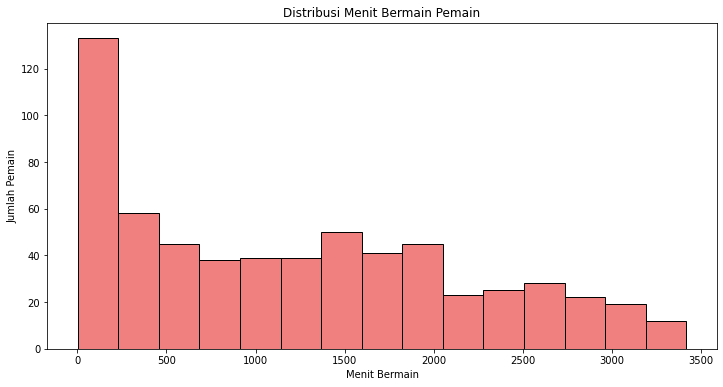

In [7]:
# Membuat bar chart distribusi menit bermain
plt.figure(figsize=(12, 6))
plt.hist(data['Min'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Distribusi Menit Bermain Pemain')
plt.xlabel('Menit Bermain')
plt.ylabel('Jumlah Pemain')
#plt.savefig('min_dist.png')

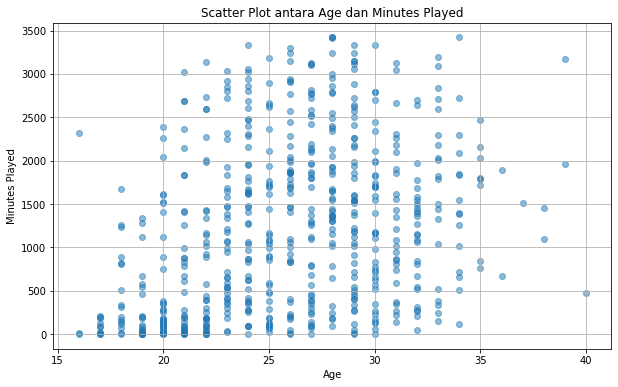

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data.Age, data.Min, alpha=0.5)
plt.title('Scatter Plot antara Age dan Minutes Played')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.grid(True)
#plt.savefig('scatter.png')

## Fitting the model
We are going to begin by doing a  straight line linear regression
A straight line relationship between minutes played and age.

In [9]:
model_fit=smf.ols(formula='Min  ~ Age', data=data).fit()
print(model_fit.summary())        
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     73.92
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           6.77e-17
Time:                        16:24:53   Log-Likelihood:                -5070.1
No. Observations:                 616   AIC:                         1.014e+04
Df Residuals:                     614   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.3642    207.420     -2.586      0.0

Comparing the fit 
 ----------------------------
We now use the fit to plot a line through the data.
where the parameters are estimated from the model fit.



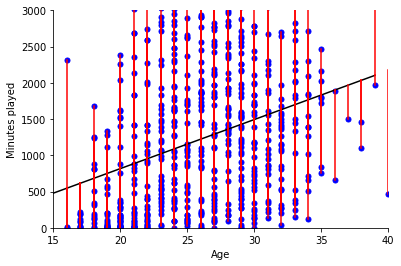

In [10]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(data['Age'], data['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0] + b[1]*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(data['Age']):
    ax.plot([a,a],[data['Min'][i], b[0] + b[1]*a ], color='red')
#plt.savefig('fit_model_age.png')
plt.show()

## Including Quadratic Age

In [11]:
data = data[["Min", "Age"]]
data['Age_squared'] = np.power(data['Age'],2)
data['Age_cubed'] = np.power(data['Age'],3)
data.head()

<ipython-input-11-bba1067177d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_squared'] = np.power(data['Age'],2)
<ipython-input-11-bba1067177d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_cubed'] = np.power(data['Age'],3)


,Min,Age,Age_squared,Age_cubed
0,560,25.0,625.0,15625.0
1,2260,29.0,841.0,24389.0
2,1616,25.0,625.0,15625.0
3,360,20.0,400.0,8000.0
4,151,33.0,1089.0,35937.0


                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.41e-21
Time:                        16:24:55   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

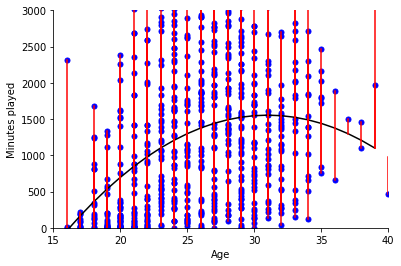

In [12]:
model_fit=smf.ols(formula='Min  ~ Age + Age_squared', data=data).fit()
print(model_fit.summary())        
b=model_fit.params

#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(data['Age'], data['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(data['Age']):
    ax.plot([a,a],[data['Min'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
#plt.savefig('fit_model_age2.png')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           8.73e-21
Time:                        16:24:56   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

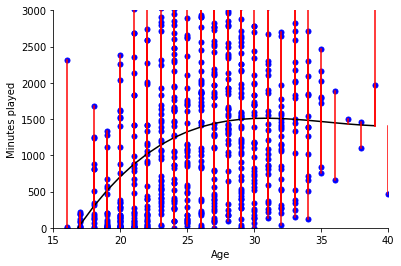

In [13]:
model_fit=smf.ols(formula='Min  ~ Age + Age_squared + Age_cubed', data=data).fit()
print(model_fit.summary())        
b=model_fit.params

#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(data['Age'], data['Min'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x + b[3]*x*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(data['Age']):
    ax.plot([a,a],[data['Min'][i], b[0] + b[1]*a + b[2]*a*a + b[3]*a*a*a], color='red')
#plt.savefig('fit_model_age3.png')
plt.show()